## Problem 3 

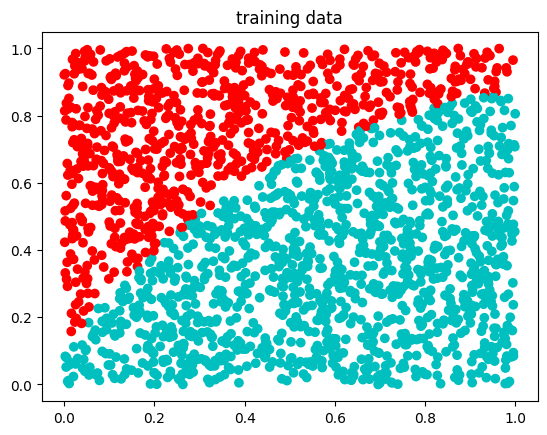

In [28]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt 
from sklearn.svm import LinearSVC

in_data = loadmat('classifier_data.mat')

x_train = in_data['x_train']
x_eval = in_data['x_eval']
y_train = in_data['y_train']
y_eval = in_data['y_eval']

n_eval = np.size(y_eval)
n_train = np.size(y_train)

plt.scatter(x_train[:,0],x_train[:,1], color=['c' if i==-1 else 'r' for i in y_train[:,0]])
plt.title('training data')
plt.show()

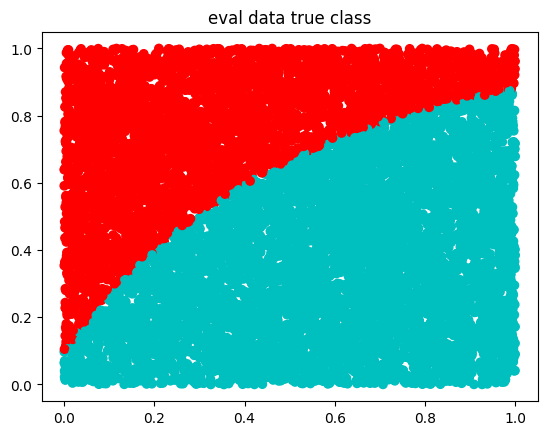

In [29]:
plt.scatter(x_eval[:,0],x_eval[:,1], color=['c' if i==-1 else 'r' for i in y_eval[:,0]])
plt.title('eval data true class')
plt.show()

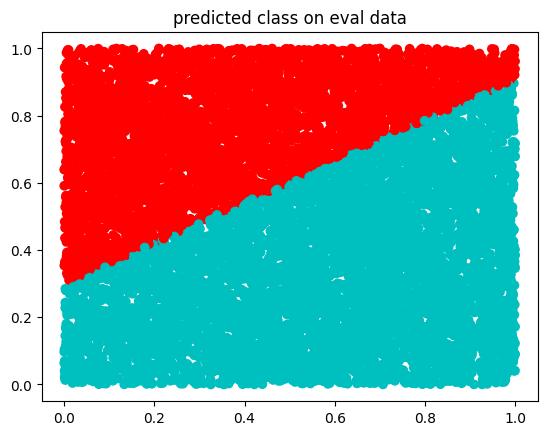

In [58]:
## Classifier 1
x_train_1 = np.hstack(( x_train, np.ones((n_train,1)) ))
x_eval_1 = np.hstack(( x_eval, np.ones((n_eval,1)) ))

# Train classifier using linear SVM from SK Learn library
clf = LinearSVC(random_state=0, tol=1e-8)
clf.fit(x_train_1, np.squeeze(y_train))
w_opt = clf.coef_.transpose()

#uncomment this line to use least squares classifier
w_opt = np.linalg.inv(x_train_1.T@x_train_1)@x_train_1.T@y_train  

y_hat_outlier = np.sign(x_eval_1@w_opt)
plt.scatter(x_eval[:,0],x_eval[:,1], color=['c' if i==-1 else 'r' for i in y_hat_outlier[:,0]])
plt.title('predicted class on eval data')
plt.show()

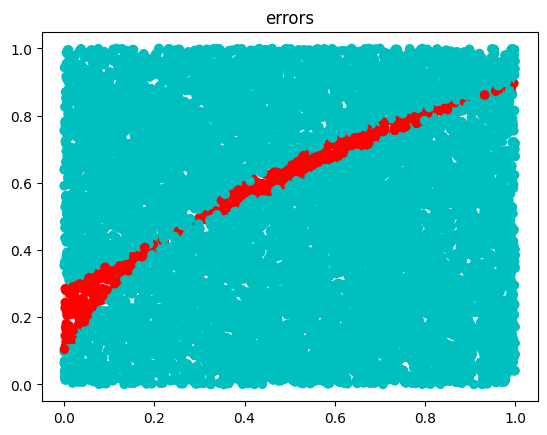

Errors: 495


In [36]:
error_vec = [0 if i[0]==i[1] else 1 for i in np.hstack((y_hat_outlier, y_eval))]
plt.scatter(x_eval[:,0],x_eval[:,1], color=['c' if i==0 else 'r' for i in error_vec])
plt.title('errors')
plt.show()

print('Errors: '+ str(sum(error_vec)))

## Add correct points far from boundary 

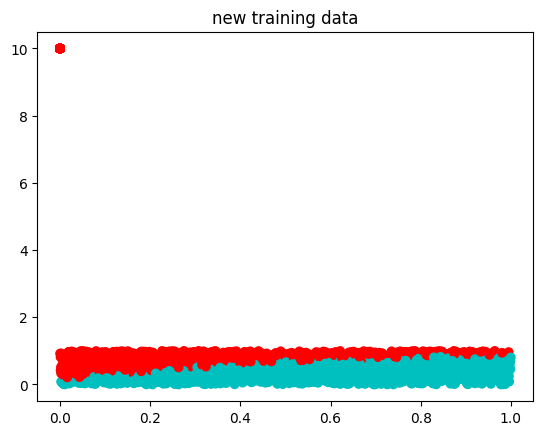

In [37]:
## create new, correctly labeled points 
n_new = 1000 #number of new datapoints
x_train_new = np.hstack((np.zeros((n_new,1)), 10*np.ones((n_new,1))))
y_train_new = np.ones((n_new,1))

## add these to the training data
x_train_outlier = np.vstack((x_train,x_train_new))
y_train_outlier = np.vstack((y_train,y_train_new))
plt.scatter(x_train_outlier[:,0],x_train_outlier[:,1], color=['c' if i==-1 else 'r' for i in y_train_outlier[:,0]])
plt.title('new training data')
plt.show()

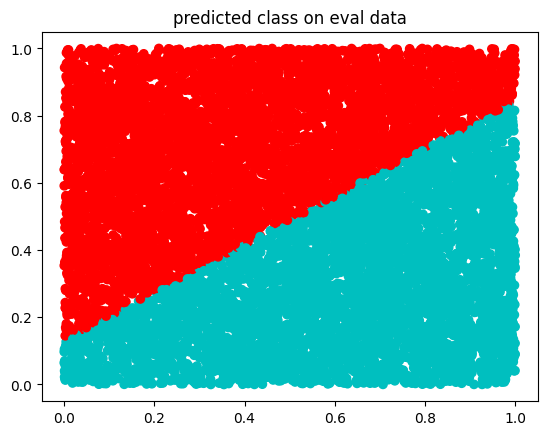

In [60]:
x_train_outlier_1 = np.hstack((x_train_outlier, np.ones((n_train+n_new,1)) ))
x_eval_1 = np.hstack((x_eval, np.ones((n_eval,1)) ))

#Train classifier using off the shelf SVM from sklearn
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(x_train_outlier_1, np.squeeze(y_train_outlier))
w_opt_outlier = clf.coef_.transpose()

#uncomment this line to use least squares classifier
#w_opt_outlier = np.linalg.inv(x_train_outlier_1.T@x_train_outlier_1)@x_train_outlier_1.T@y_train_outlier

y_hat_outlier = np.sign(x_eval_1@w_opt_outlier)
plt.scatter(x_eval[:,0],x_eval[:,1], color=['c' if i==-1 else 'r' for i in y_hat_outlier[:,0]])
plt.title('predicted class on eval data')
plt.show()

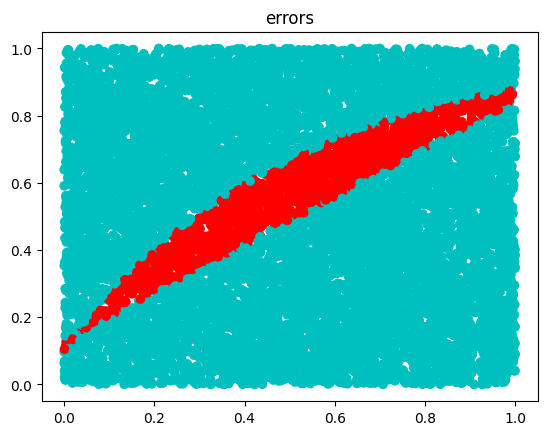

Errors: 1213


In [61]:
error_vec = [0 if i[0]==i[1] else 1 for i in np.hstack((y_hat_outlier, y_eval))]
plt.scatter(x_eval[:,0],x_eval[:,1], color=['c' if i==0 else 'r' for i in error_vec])
plt.title('errors')
plt.show()

print('Errors: '+ str(sum(error_vec)))